<div class="alert alert-success">
<font size="4"><b>Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Привет, Алексей :) Спасибо, что прислал задание :) Меня зовут Ринат Хисамов и я буду проверять твой проект. Предлагаю обращаться друг к другу на ты. Так нам будет гораздо проще и удобней общаться).
      
Поехали 🚀

# Яндекс.Музыка <span id=start></span>

На данных Яндекс.Музыки сравним поведение пользователей двух столиц.

**Цель исследования** — проверим три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. [Обзор данных](#intro)
 2. [Предобработка данных](#preprocess)
 3. [Проверка гипотез](#analytics)



## Обзор данных <a id=intro></a>


In [1]:
# импорт библиотеки pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  statistics import median, mode, mean

sns.set_style('white')
plt.rcParams['figure.dpi'] = 96
plt.rcParams['savefig.dpi'] = 96

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Первый раз вижу сиборн у студента на первом проекте , круто 💎


In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/yandex_music_project.csv')

In [3]:
# получение первых 10 строк таблицы df
display(df.head(10))

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [4]:
# получение общей информации о данных в таблице df, можно и без print, но…
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
None


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Неинформативные названия:
  1. `time` — пусть будет `start_time`.
  2. `Track` — пусть будет `track_title`



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


<div class="alert alert">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
        <font size="3", color = "black">
                <br /> 
Осталось найти другую третью проблему с названиями колонок :) userID 

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Отлично справился с обзором данных 💎, и не только :)

## Предобработка данных <a id=preprocess></a>

* исправим заголовки столбцов;
* исключим пропуски данных;
* проверим данные на дубликаты;

### Стиль заголовков
Посмотрим на названия столбцов **до редактирования**:

In [5]:
# перечень названий столбцов таблицы df
print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


Приведём названия в соответствие «хорошему» стилю:
* применим «змеиный_регистр»;
* все символы сделаем строчными;
* устраним пробелы;
* добавим информативности;

Для этого переименуем колонки:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track_title'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`;
* `'time'` → `'start_time'`;

In [6]:
# переименование столбцов
df.rename({'  userID': 'user_id',
           'Track': 'track_title',
           '  City  ': 'city',
           'Day': 'day',
           'time': 'start_time'},
          axis='columns', inplace=True)

Посмотрим на названия столбцов **после редактирования**:

In [7]:
# перечень названий столбцов таблицы df
print(df.columns)

Index(['user_id', 'track_title', 'artist', 'genre', 'city', 'start_time',
       'day'],
      dtype='object')


In [8]:
# получение первых 10 строк таблицы df
display(df.head(10))

,user_id,track_title,artist,genre,city,start_time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Так-то лучше ✨

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
согласен, 💎

### Пропуски значений

Посмотрим, сколько в таблице пропущенных значений:

In [9]:
# подсчёт пропусков
display(df.isna().sum())

user_id           0
track_title    1231
artist         7203
genre          1198
city              0
start_time        0
day               0
dtype: int64

**7203** потерянных артиста 😱

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
без потеряшек нельзя :) 💎

Хорошо, что пропуски в `track_title` и `artist` не так важны для нашего исследования. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

In [10]:
# список столбцов для замены пропущенных значений
columns_to_replace = ('track_title', 'artist', 'genre')

# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
for col in columns_to_replace:
    df[col].fillna(value='unknown', inplace=True)

Убедимся, что в таблице не осталось пропусков.

In [11]:
# подсчёт пропусков
display(df.isna().sum())

user_id        0
track_title    0
artist         0
genre          0
city           0
start_time     0
day            0
dtype: int64

То что нужно 👌

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
💎

### Дубликаты


In [12]:
# подсчёт явных дубликатов
print('Одинаковых строк в наборе данных:', df.duplicated().sum())

Одинаковых строк в наборе данных: 3826


In [13]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df.drop_duplicates(inplace=True)

# странно, если добавить ', ignore_index=True', то схлопочем
# TypeError: drop_duplicates() got an unexpected keyword argument 'ignore_index'

print(pd.__version__)

1.3.5


**Версия Pandas в jupyter тренажёра 0.25.1**

`ignore_index` — выпустили в версии Pandas 1.0.0 (January 29, 2020)

Версия Pandas доступная сейчас 1.4.0 (January 22, 2022)

Такая вот аналитика 🤷‍♂️

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
За изобретательность пять 🙃, за проект — давайте свою зачетку :)
        
Обновления запланированы, ждем :)

In [14]:
# посмотрим на соответствие индексов
display(df.tail(1))
display(df.shape)

,user_id,track_title,artist,genre,city,start_time,day
65078,3A64EF84,Tell Me Sweet Little Lies,Monica Lopez,country,Moscow,21:59:46,Friday


(61253, 7)

Как там сбрасывали индексы в костёр инквизиции? В далёком 0.25.1

🔥

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="5", color = "black">
<br />
👼

In [15]:
# с удалением старых индексов и формированием новых, как просили…
df.reset_index(drop=True, inplace=True)

In [16]:
# посмотрим на соответствие индексов
display(df.tail(1))
display(df.shape)

,user_id,track_title,artist,genre,city,start_time,day
61252,3A64EF84,Tell Me Sweet Little Lies,Monica Lopez,country,Moscow,21:59:46,Friday


(61253, 7)

Всё исчезло не осталось и следа…

Шестьдесят один двести пятьдесят двааа

🎤

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Вы справились! Сэррр :)

In [17]:
# подсчёт явных дубликатов
display(df.duplicated().sum())

0

Не будем повторять дважды)

Поищем неявные дубликаты в столбце `'genre'`:

In [18]:
# Просмотр уникальных названий жанров
display(df['genre'].sort_values().unique())


array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

In [19]:
# Количество уникальных названий жанров
print('Количество уникальных названий жанров:', len(df['genre'].sort_values().unique()))

Количество уникальных названий жанров: 290


Погуглил и решил заменить:

|«Клон»                         |Оригинал       |
|:--------------------------    |:------------  |
| `'africa'`                    | `'afrikaans'` |
| `'deutschspr'`                | `'german'`    |
| `'электроника'`               | `'electronic'`|
| `'folklore'`                  | `'folk'`      |
| `'frankreich', 'französisch'` | `'french'`    |
| `'neue'`                      | `'new'`       |
| `'poprussian'`                | `'ruspop'`    |
| `'türk', 'türkçe'`            | `'turkish'`   |
| `'hip', 'hip-hop', 'hop'`     | `'hiphop'`    |
    
    ну да-да — hip-hop не гуглил)

А что делать с этими, лучше спросить у колег или Артемия Троицкого:
* `'ïîï'`
* `'animated', 'anime'`
* `'soul', 'soulful'`

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="5", color = "black">
<br />
😂

In [20]:
genres_correction = (
    (('africa',), 'afrikaans'),
    (('deutschspr',), 'german'),
    (('электроника',), 'electronic'),
    (('folklore',), 'folk'),
    (('frankreich', 'französisch',), 'french',),
    (('hip', 'hip-hop', 'hop',), 'hiphop'),
    (('neue',), 'new'),
    (('poprussian',), 'ruspop'),
    (('türk', 'türkçe',), 'turkish'),
)

In [21]:
# Функция для замены неявных дубликатов
# Функция должна исправить колонку `genre` в таблице `df`:
#     заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.
def replace_wrong_genres(data_frame, wrong_genres, correct_genre):
    for wrong_genre in wrong_genres:
        data_frame['genre'].replace(to_replace=wrong_genre, value=correct_genre, inplace=True)
    

In [22]:
# Устранение неявных дубликатов
for genre_correction in genres_correction:
    replace_wrong_genres(data_frame=df,
                         wrong_genres=genre_correction[0],
                         correct_genre=genre_correction[1])

In [23]:
# Просмотр уникальных названий жанров
display(df['genre'].sort_values().unique())


array(['acid', 'acoustic', 'action', 'adult', 'afrikaans', 'alternative',
       'alternativepunk', 'ambient', 'americana', 'animated', 'anime',
       'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook',
       'author', 'avantgarde', 'axé', 'baile', 'balkan', 'beats',
       'bigroom', 'black', 'bluegrass', 'blues', 'bollywood', 'bossa',
       'brazilian', 'breakbeat', 'breaks', 'broadway', 'cantautori',
       'cantopop', 'canzone', 'caribbean', 'caucasian', 'celtic',
       'chamber', 'chanson', 'children', 'chill', 'chinese', 'choral',
       'christian', 'christmas', 'classical', 'classicmetal', 'club',
       'colombian', 'comedy', 'conjazz', 'contemporary', 'country',
       'cuban', 'dance', 'dancehall', 'dancepop', 'dark', 'death', 'deep',
       'deutschrock', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat',
       'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy',
       'electronic', 'electropop', 'emo', 'entehno', 'epicmetal',
       'estrada', '

In [24]:
# Количество уникальных названий жанров
print('Количество уникальных названий жанров:', len(df['genre'].sort_values().unique()))

Количество уникальных названий жанров: 278


Похоже, что с hiphop всё тип-топ.

Но вот функция из одного лишь `for` и вызов функции выглядят куце… 

**Выводы**

Предобработкой нашли три проблемы в данных:

- нарушения в стиле заголовков;
- пропущенные значения;
- дубликаты — явные и неявные;

Чтобы упростить работу с таблицей исправили:
- заголовки привели к единому стилю
- пропущенные значения заменили на `'unknown'`, но ещё предстоит увидеть, как повлияют эти замены в колонке `genre` на исследование.
- устранили дубликаты — явные и неявные;


Теперь можно перейти к проверке гипотез. 🚀

## Проверка гипотез <span id=analytics></span>

### Сравнение поведения пользователей двух столиц

**Гипотеза № 1**

> Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.

> Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт- Петербурге. Проверьте это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:
>
> * Разделите пользователей Москвы и Санкт-Петербурга
> * Сравните, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


In [25]:
# точно ли два города, а то может «Питер» где затесался
print(df['city'].unique())

['Saint-Petersburg' 'Moscow']


❤️

In [26]:
# какие дни недели в данных
print(df['day'].unique())

['Wednesday' 'Friday' 'Monday']


Как аналитик оптимист, считаю что таблица на 3/7 полна…

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="4", color = "black">
<br />
хорошо что оптимист, 😅

In [27]:
# Подсчёт прослушиваний в каждом городе
msk_df = df.loc[df['city'] == 'Moscow']
spb_df = df.loc[df['city'] == 'Saint-Petersburg']
msk_df.reset_index(drop=True, inplace=True)
spb_df.reset_index(drop=True, inplace=True)
display(msk_df.shape)
display(spb_df.shape)

(42741, 7)

(18512, 7)

> В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

© Кэп

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
все верно 💎

In [28]:
# Подсчёт прослушиваний в каждый из трёх дней
# MSK
msk_count_mon = msk_df['day'].loc[msk_df['day'] == 'Monday'].count()
msk_count_wed = msk_df['day'].loc[msk_df['day'] == 'Wednesday'].count()
msk_count_fri = msk_df['day'].loc[msk_df['day'] == 'Friday'].count()

# SPB
spb_count_mon = spb_df['day'].loc[spb_df['day'] == 'Monday'].count()
spb_count_wed = spb_df['day'].loc[spb_df['day'] == 'Wednesday'].count()
spb_count_fri = spb_df['day'].loc[spb_df['day'] == 'Friday'].count()

print('Moscow, прослушиваний')
print('\tпонедельник:', msk_count_mon)
print('\tсреда:', msk_count_wed)
print('\tпятница:', msk_count_fri)
print('\nSaint-Petersburg, прослушиваний')
print('\tпонедельник:', spb_count_mon)
print('\tсреда:', spb_count_wed)
print('\tпятница:', spb_count_fri)

Moscow, прослушиваний
	понедельник: 15740
	среда: 11056
	пятница: 15945

Saint-Petersburg, прослушиваний
	понедельник: 5614
	среда: 7003
	пятница: 5895


Петербург музыкальная среда…

Особенно по средам.

> Вы видели, как работает группировка по городу и по дням недели. Теперь напишите функцию, которая объединит два эти расчёта.
> 
> Создайте функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. > Ей понадобятся два параметра:
> * день недели,
> * название города.
> 
> В функции сохраните в переменную строки исходной таблицы, у которых значение:
>   * в колонке `day` равно параметру `day`,
>   * в колонке `city` равно параметру `city`.
> 
> Для этого примените последовательную фильтрацию с логической индексацией.
> 
> Затем посчитайте значения в столбце `user_id` получившейся таблицы. Результат сохраните в новую переменную. Верните эту переменную из функции.

In [29]:
# Функция для подсчёта прослушиваний для конкретного города и дня.


def number_tracks(day, city):
    track_list_count = df.loc[(df['day'] == day) & (df['city'] == city)]['user_id'].count()
    return track_list_count



> Вызовите `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [30]:
# количество прослушиваний в Москве по понедельникам
print('Мск, пн', end=': ')
print(number_tracks('Monday', 'Moscow'))

# количество прослушиваний в Санкт-Петербурге по понедельникам
print('СПб, пн', end=': ')
print(number_tracks('Monday', 'Saint-Petersburg'))

Мск, пн: 15740
СПб, пн: 5614


In [31]:
# количество прослушиваний в Москве по средам
print('Мск, ср', end=': ')
print(number_tracks('Wednesday', 'Moscow'))

# количество прослушиваний в Санкт-Петербурге по средам
print('СПб, ср', end=': ')
print(number_tracks('Wednesday', 'Saint-Petersburg'))

Мск, ср: 11056
СПб, ср: 7003


In [32]:
# количество прослушиваний в Москве по пятницам
print('Мск, пт', end=': ')
print(number_tracks('Friday', 'Moscow'))

# количество прослушиваний в Санкт-Петербурге по пятницам
print('СПб, пт', end=': ')
print(number_tracks('Friday', 'Saint-Petersburg'))

Мск, пт: 15945
СПб, пт: 5895


> Создайте c помощью конструктора `pd.DataFrame` таблицу, где
> * названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
> * данные — результаты, которые вы получили с помощью `number_tracks`.

In [33]:
# Таблица с результатами
city_days_columns = ['city', 'monday', 'wednesday', 'friday']
city_days_data = [
    ['Moscow', 15740, 11056, 15945],
    ['Saint-Petersburg', 5614, 7003, 5895]
]

city_days_df = pd.DataFrame(data=city_days_data, columns=city_days_columns)
city_days_df.set_index('city',inplace=True)
display(city_days_df)

# Moscow, прослушиваний
# 	понедельник: 15740
# 	среда: 11056
# 	пятница: 15945

# Saint-Petersburg, прослушиваний
# 	понедельник: 5614
# 	среда: 7003
# 	пятница: 5895

,monday,wednesday,friday
city,,,
Moscow,15740,11056,15945
Saint-Petersburg,5614,7003,5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
Похоже, что подтвердили [первую гипотезу](#start).

### Музыка в начале и в конце недели

**Гипотеза № 2**

> В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

In [34]:
# все данные где 'city' равно 'Moscow'
moscow_general = msk_df
# display(moscow_general)

In [35]:
# все данные где 'city' равно 'Saint-Petersburg'
spb_general = spb_df
# display(spb_general)

> Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [36]:
# функция вернёт 10 первых популярных жанров
# в указанный день, в заданное время из таблицы для Москва или Петербурга


def genre_weekday(city_data, day_2_check, from_time, till_time):
    dec_from_time = int(from_time.split(':')[0]) * 3600 + int(from_time.split(':')[1]) * 60
    dec_till_time = int(till_time.split(':')[0]) * 3600 + int(till_time.split(':')[1]) * 60
    genre_df = city_data.copy()
    genre_df['start_time'] = genre_df['start_time'].apply(lambda x: (int(x.split(':')[0]) * 3600) +
                                                          (int(x.split(':')[1]) * 60) +
                                                          int(x.split(':')[2]))

    genre_df = genre_df.loc[(genre_df['day'] == day_2_check) &
                            (genre_df['start_time'] > dec_from_time) &
                            (genre_df['start_time'] < dec_till_time)]
    
    genre_df_count = genre_df.groupby(by='genre')['genre'].count()
    genre_df_count.sort_values(ascending=False, inplace=True)
    
    return genre_df_count.head(10)



<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Разминка прошла успешно 😉, 
        
    Не думай о секундах свысока.
    Наступит время, сам поймешь, наверное,-
    свистят они,
    как пули у виска...
        Песня: «Мгновения»

In [37]:
# вызов функции для утра понедельника в Москве
display(genre_weekday(moscow_general, 'Monday', '7:00',  '11:00'))

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: genre, dtype: int64

In [38]:
# вызов функции для утра понедельника в Петербурге
display(genre_weekday(spb_general, 'Monday', '7:00',  '11:00'))

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: genre, dtype: int64

In [39]:
# вызов функции для вечера пятницы в Москве
display(genre_weekday(moscow_general, 'Friday', '19:00',  '23:00'))

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: genre, dtype: int64

In [40]:
# вызов функции для вечера пятницы в Петербурге
display(genre_weekday(spb_general, 'Friday', '19:00',  '23:00'))

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: genre, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку (— это политкорректное название попсы), в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге


**Гипотеза № 3**:
> Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [41]:
# треки каждого жанра в порядке убывания для Москвы
moscow_genres = moscow_general.groupby(by='genre')['genre'].count()
moscow_genres.sort_values(ascending=False, inplace=True)

top_ten_moscow_genres = moscow_genres.head(10)

# просмотр первых 10 строк moscow_genres
display(top_ten_moscow_genres)

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64

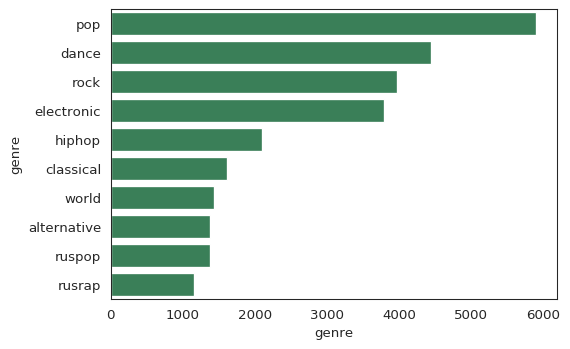

In [42]:
# первых 10 жанров в порядке убывания популярности для Москвы
sns.barplot(y=top_ten_moscow_genres.index, x=top_ten_moscow_genres, color="seagreen")

In [43]:
# треки каждого жанра в порядке убывания для СПб
spb_genres = moscow_general.groupby(by='genre')['genre'].count()
spb_genres.sort_values(ascending=False, inplace=True)

top_ten_spb_genres = spb_genres.head(10)
# просмотр первых 10 строк spb_genres
display(top_ten_spb_genres)

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64

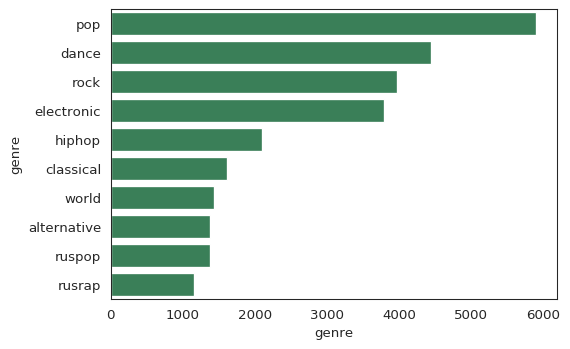

In [44]:
# график первых 10 жанров в порядке убывания популярности для Петербурга
sns.barplot(y=top_ten_spb_genres.index, x=top_ten_spb_genres, color="seagreen")

**Выводы**

Гипотеза частично подтвердилась:

> Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, русский рэп одинаково популярен в Москве и Петербурге. На 10 строчке нашего хит-парада. 


## Итоги исследования

> Вы проверили три гипотезы и установили:
> 
> 1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 
> 
> Первая гипотеза полностью подтвердилась.
> 
> 2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
> * в Москве слушают музыку жанра “world”,
> * в Петербурге — джаз и классику.
> 
> Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.
> 
> 3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.
> 
> Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.
> 
> **На практике исследования содержат проверки статистических гипотез.**
> Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
> Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 
> С методами проверок гипотез вы ещё познакомитесь в следующих темах.

## P.S.


### Сколько пользователь слушет треков в день

In [45]:
def how_users_listen(df_by_city):
    days_items = ['Monday', 'Wednesday', 'Friday']
#     songs_per_day = pd.Series(dtype=int)
#     КОСТЫЛЬ с list
    songs_per_day = []

    for day in days_items:
        df_daly = df_by_city.loc[df_by_city['day'] == day]
        df_daly = df_daly.groupby(by='user_id')['track_title'].count()

#         pd.concat([songs_per_day, df_daly], ignore_index=True)
#         songs_per_day.append(df_daly, ignore_index=True)
#         append и concat возвращал пустую Series (
#         КОСТЫЛЬ с list

        df_daly = list(df_daly)
        songs_per_day.extend(df_daly)
        
    songs_per_day = pd.Series(songs_per_day, dtype=int)
    
    return songs_per_day

Прослушиваний в день на пользователя Мск:
Медиана: 1
Мода: 1
count    32437.000000
mean         1.317662
std          1.105553
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         57.000000
dtype: float64


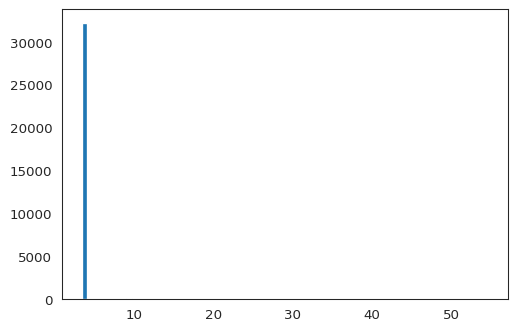

In [46]:
# print(sns.__version__)
# histplot неизвестный аргумент seaborn 0.9.0 в тренажере
# AttributeError: module 'seaborn' has no attribute 'histplot'

to_plot = how_users_listen(msk_df)
plt.hist(to_plot, rwidth=0.1250)

print('Прослушиваний в день на пользователя Мск:')
print('Медиана:', median(to_plot))
print('Мода:', mode(to_plot))
print(to_plot.describe())

Прослушиваний в день на пользователя СПб:
Медиана: 1
Мода: 1
count    13971.000000
mean         1.325030
std          1.024644
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         33.000000
dtype: float64


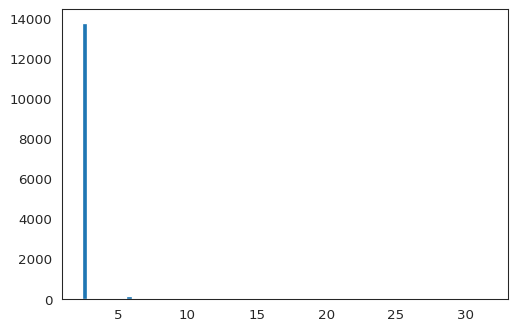

In [47]:
# print(sns.__version__)
# histplot неизвестный аргумент seaborn 0.9.0 в тренажере
# AttributeError: module 'seaborn' has no attribute 'histplot'

to_plot = how_users_listen(spb_df)
plt.hist(to_plot, rwidth=0.1250)

print('Прослушиваний в день на пользователя СПб:')
print('Медиана:', median(to_plot))
print('Мода:', mode(to_plot))
print(to_plot.describe())

В Москве за день максимально слушали 57 треков, в Петербурге 33.

При этом мода 1.

* То есть один трек в день!
* Помнишь ещё — в наборе данных только три дня в неделе!

Похоже, у нас проблемы. Запахло фальсификацией данных.

Точно говорю, ну не может в Петербурге попса быть на первом месте…

**THE END**
To Be Continued...

<div class="alert alert-success">
<font size="5", color = "green"><b>😂😂😂😂😂 Это от радости, что есть такие студенты :) </b></font>

In [48]:
# «без костылей» 😏, воспользовался твоими датасетами :)
(
    (spb_df
         .groupby(['day', 'city', 'user_id'])
         .agg({'genre':'count'})
         .reset_index()
         )
    ['genre'].describe()
)

count    13971.000000
mean         1.325030
std          1.024644
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         33.000000
Name: genre, dtype: float64

In [49]:
# количество песен, прослушанных за один день одним Пользователем, 
# период выборки 3 дня, охват выборки 2 города
# охват Пользователей для выборки — «через мелкое сито минимального среднего чека» 😁

(
    (msk_df
         .groupby(['day', 'city', 'user_id'])
         .agg({'genre':'count'})
         .reset_index()
         .sort_values(by='genre'))
    ['genre'].value_counts()
)


1     26614
2      3889
3      1075
4       379
5       192
6       100
7        50
8        39
9        25
11       15
10       13
16        8
12        7
15        5
14        5
17        3
13        2
18        2
20        2
21        2
32        1
36        1
34        1
33        1
22        1
30        1
28        1
23        1
19        1
57        1
Name: genre, dtype: int64

In [50]:
# Для более близкого знакомства c Пользователями,
# сколько Пользователей прослушало больше 10 треков за день в каждом городе 😁 

(
    (df
         .groupby(['day', 'city', 'user_id'])
         .agg({'genre':'count'})
         .reset_index()
         .sort_values(by='genre')
         .query('genre > 10')
            )
                .groupby(['city', 'day'])
                .agg({'user_id': 'count'})
                .rename(columns={'user_id': 'amount_user_listen_more_10_track'})
    
)

amount_user_listen_more_10_track
city             day                                        
Moscow           Friday                                   24
                 Monday                                   20
                 Wednesday                                17
Saint-Petersburg Friday                                    3
                 Monday                                    8
                 Wednesday                                13

<div class="alert alert-success">
<font size="5", color = "green"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="4", color = "black">
<br />    
<b>Ты ПЕРЕвыполнил все пункты работы, молодец!</b> 
        
Критических ❌ комментариев нет 😀, их не может просто существовать для тебя на первом проекте
        
Если будут вопросы про мои комментарии - задавай, если какой-то формат взаимодействия не устраивает или есть какие-то другие пожелания - пиши :)
        
<p> <font size="4", color = "black">
<b>Отправляю тебе проект с единственной целью — уточнить не осталось ли каких-либо вопросов по <s>проекту</s> взаимодействию, если есть задавай в своих комментариях 😉</b>

<div class="alert alert">
    <font size="5", color = "green"><b>Жду твой проект и твои комментарии 🤝</b></font><br />